#Semester Project

**April 28, 2025**

**Jumpei Kasai & Isaac Hinze**

##Introduction

In this project, we chose the U.S. Domestic Flights dataset because it provides a clear view of how people travel between cities in the United States. The data covers every quarter from 1993 to 2024. By using this information, we can learn which flights are most popular, how far passengers travel, how much they pay on average, and so on.

We focus on three ideas. First, A visualization of the airport, airline, and flight route popularity. Second, Fare Analysis with a scatter plot. Third, the Airline Analysis, which visually shows from a specific airport. These help us understand where and how airlines compete and how that affects travelers.

Through this project, our goal is to use a map and a plot to tell the story behind this data and market. We will show which airport handles the most traffic, highlight the relationship between distance range and flight fare, and compare carriers by their share of the market.

##Data

Flight route data was sourced from Kaggle user Bhavik Jikadara. This dataset titled, "US Airline Flight Routes and Fares 1993-2024", was composed of 245,955 rows and 23 columns, providing quarterly data on domestic U.S. flights, excluding Alaska, Hawaii, and all U.S. territories. The most useful columns for our visualizations proved to be "airport_1" and "airport_2" which were used for identifiers as well as keys to access locations of sending and receiving airports respectively, however, this data set included many other interesting columns such the number of passengers, the largest carrier, the market share of the largest carrier, as well as the average fare for each flight route. The latter mentioned columns served as effective ways to describe trends in air traffic data and as scales to size and color aspects to enhance our visualizations. This data set, in the form of a csv, was loaded into a Pandas data frame, and following cleaning was treated as the main data frame for the entirety of the applications development.
<br>
<br>

Additional airport data was the missing piece to the puzzle of providing engaging geographical figures. The "airportsdata" Python package was a quick way of filling this gap, allowing us to use any airport's IATA code, in most cases provided by the flight route data set, to access the airport's latitude and longitude coordinates. In essence, this allowed us to treat the airport code as a foreign key in the flight route data frame, and as a primary key in this airports dictionary. For the sake of simplicity however, we used this to add latitude and longitude coordinates for sending and receiving airports to the main data frame one time only, to prevent a constant cross referencing of tables.
<br>
<br>
While the two main data sources used for this project were easily accessible and for the most part friendly to work with, we did encounter a few set backs. Starting with the most minor one, the flight route data frame included two columns, 'Geocoded_City1' and 'Geocoded_City2' that were almost entirely null, therefore these columns were both removed from the main data frame to prevent future issues in data cleaning and manipulation.
<br>
<br>
While attempting to add latitude and longitude coordinates of airports to the main data frame, we encountered some deviations between our airports dictionary and our flight routes data frame. Namely, multiple airport codes in the flight routes data frame were not listed as keys in the airports dictionary. In each case, this seemed to be due to one of the following causes:


1.   The code in the flight routes data frame referred to a city and not a specific airport (ex. 'CHI' instead of 'ORD' or 'MDW').
2.   The airport was obscure enough to not be contained in the airportsdata package.
2.   The code in the flight routes data frame referred to a defunct airport and is no longer a valid IATA code.
3.   Typos and generally wrong airport codes.

Each of these problems were handled manually, first by printing out problematic airport codes. For problems of type 1, 2, and 3, we added these codes to the airports dictionary, searching up the corresponding latitudes and longitudes of the city or airport. Problems of type 4 required closer examination and research as these were codes that are not and have never been associated with any airport. Therefore, we made judgement decisions on which airport was likely being referred to. Fortunately, there were few cases of this, and the traffic to these airports was very small, meaning in the event that we did misjudge the intended airport, the consequences of this would be very little.





In [ ]:
!pip install -q gdown
import gdown
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
url = 'https://drive.google.com/uc?id=1SDQdskYjhUNWKRlKwSa189BenJsgHl8E'
gdown.download(url, 'airports.csv', quiet=True)
mainDF = pd.read_csv('airports.csv')
mainDF.head()


<ipython-input-2-a5abcbbf5f71>:3: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  mainDF = pd.read_csv('airports.csv')


,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


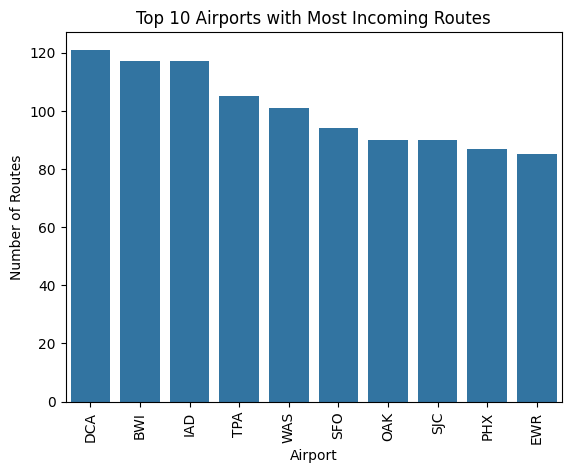

In [ ]:
ap2counts = duckdb.query("""SELECT airport_2, COUNT(DISTINCT airport_1) as num_routes FROM mainDF GROUP BY airport_2 ORDER BY num_routes DESC""").to_df()
sub_ap2counts = ap2counts.head(10)
sns.barplot(data=sub_ap2counts, x='airport_2', y='num_routes')
plt.xticks(rotation=90)
plt.ylabel('Number of Routes')
plt.xlabel('Airport')
plt.title('Top 10 Airports with Most Incoming Routes')
plt.style.use('fivethirtyeight')
plt.show()

## Application

In our application, we decided to include four plotly figures, three of which being maps, with the remaining one being a scatter plot. We knew from the start that we wanted to include some way of visualizing airport popularity across the nation on a map. To do this, we used a Plotly Scattergeo graphical object, initially using the number of distinct outgoing flight routes as the size determining metric of each marker. However, we soon realized that there were other metrics of airport popularity, and the nature of our data set allowed us to use this to our advantage. First of all, with the Scattergeo structure already in place, it seemed unreasonable to add another figure to show which airports had the most incoming routes as well. Secondly, perhaps a more telling measure of an airports popularity is the amount of people flying in and out of it. To address these concerns we added year inputs to control the beginning and end year range of data, radio buttons to decide between incoming or outcoming popularity, and radio buttons to decide between measuring by number of flights or by amount of people. The selected measurement type (people or number of flights) was used to scale the size of the markers, and the ranking of the airport based on the selected measurement type determined the color of the marker. We decided to use this ranking color key rather than a continuous color scale based directly on the measurement as a way to emphasize the top 3 most popular airports based on the provided parameters.

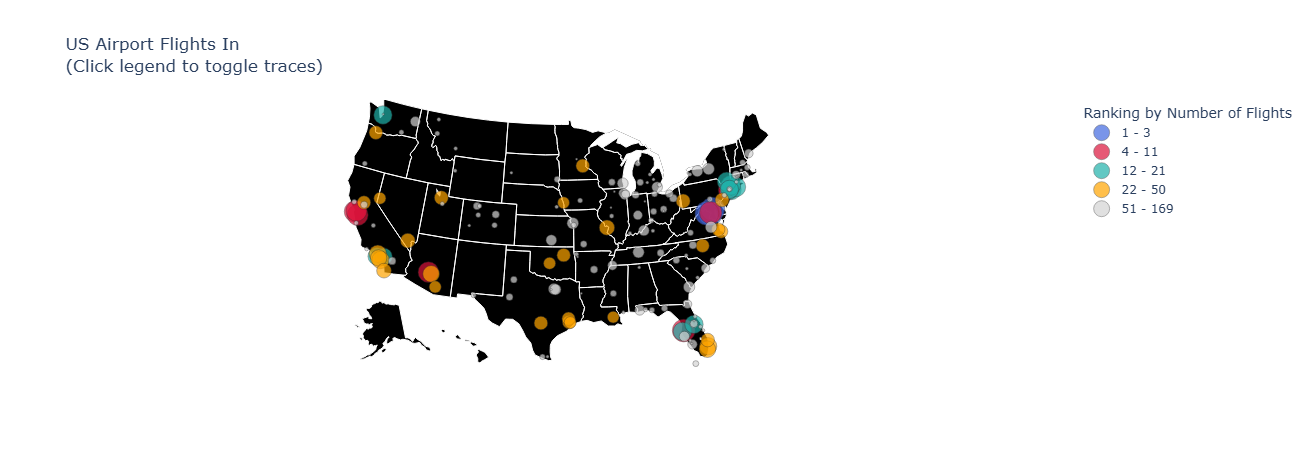

<br>

For our second figure, we wanted to show the correlation between the distance of a flight and its fare. However, we felt that a standard scatterplot might not tell the whole story. Therefore, while having our flight distance be the x-axis and the average fare of the flight be the y-axis we also controlled the size of the markers based on the number of passengers that went on that flight route in the given period to bring more attention to flights with more passengers, and we scaled the color of the marker based on the market share of the largest carrier of that flight. This may seem random at first, however, this allows us to see how three different variables affect airfare, all in the simplicity of a two dimensional scatterplot. For example, if we saw a marker at a low distance but a relatively fare, we could see if the number of passengers or the amount control the largest carrier has over the market is causing this.

This plot was one of the more difficult ones to think about logically as we had to think about the ways we needed to aggregate market shares and passengers to display this data. We initially found success using DuckDB queries, however, when it came to running our app, this ended up being one of our biggest road blocks as we encountered troubles with running DuckDB queries within filtering functions on the same data frame multiple times. It was at this point we decided to refactor all of our filtering and querying functions to use base methods in the Pandas.DataFrame class.

The following image shows the fare analysis of flights to O'Hare (ORD) from 1993 to 2024.



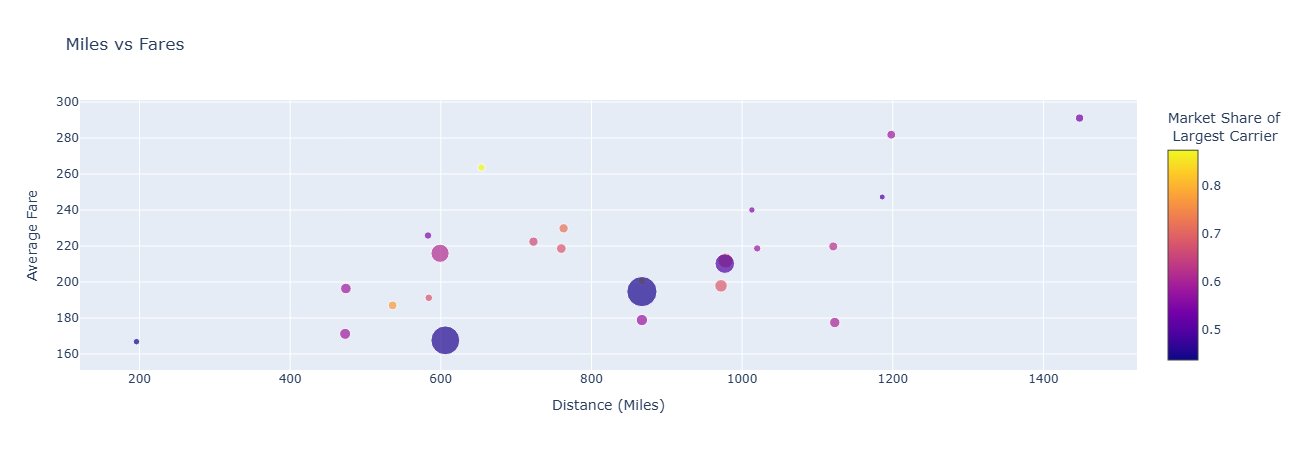

<br>

Finally, we wanted to show an engaging visualization of flights to and from a particular airport as well as the largest carriers of these flights. While a valuable representation of our data, this idea has some limitations. First of all, this can only be represented in one quarter of one year, otherwise we would presumably have cases of different largest carriers for the same route and no reasonable way to handle this. Secondly, this visualization is only meaningful for one airport at a time. In the airport dropdown, we decided to make 'ORD' the default by virtue of the fact that it has the most outgoing routes. This seemed as good of a reason as any.

<br>

In order to make these figures with meaningful legends displaying the airline codes, we first had to find out which airlines where provided in/out of the selected airport and sort these based on the amount of flights they carried. For the sake of a concise map and legend, airlines outside of the top 3 most frequent carriers were referred to as 'Other' and drawn together as such on the figure.

<br>

The biggest challenge with making this map was figuring out how to properly add traces. In order to dynamically adjust the size of the line based on the number of passengers on that flight route, we had to iterate through the rows of each sub-dataframe of each airline, add a trace, and add it to the legend only if it was the first one in that sub-dataframe.

<br>

The following images show the flights and largest carriers to and from O'Hare.

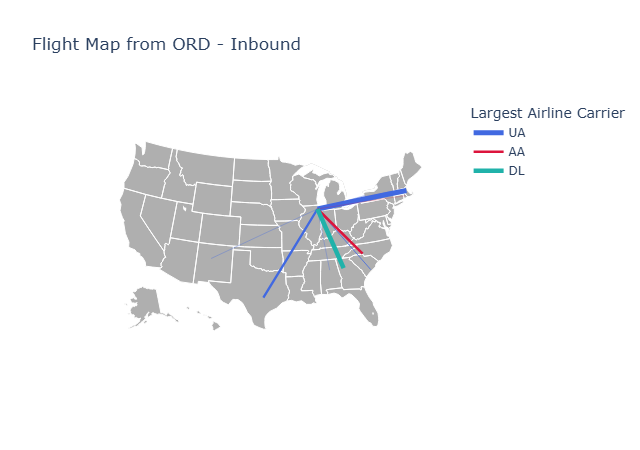

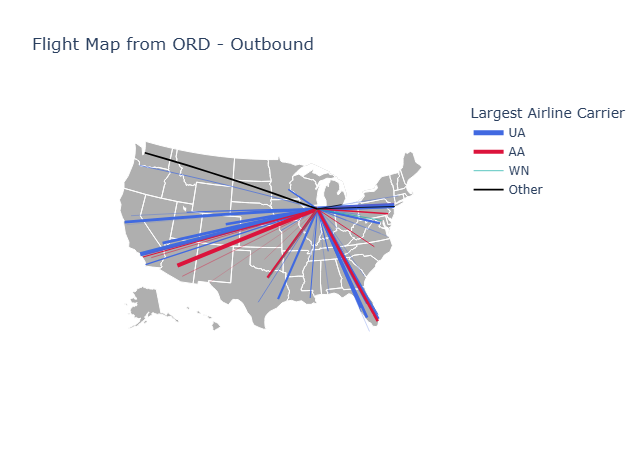

## Conclusion

Overall, we believe that this application provides powerful visual representations of airport traffic from 1993 to 2024, not only giving users the ability to view, but also easily query multiple conditions and variables within an informative dataset through our backend data processing functions. Our first figure gives the user the ability to see where all the popular airports are based on flights in, flights out, the number of flights, and the number of passengers. Our second figure, being a scatterplot of flight distance vs airfare gives users the ability to visualize trends not only in fares but also number of passengers and market competition in flights to or from one or multiple airports. Finally, our last figure shows all of the flights to and from one given airport on a map, adjusting the size of each line based on that flight route's popularity as well as color coding the flight based on the flight's largest carrier.
<br>

Given more time, there are some things that we would have liked to accomplish in developing this application. First of all, we would have liked to have created a more robust user interface. As it stands now, the application works just fine for any sensible use, however, more can be done to handle strange inputs (2020.5 in the year input for example). The application does not crash rather it would return an empty plot. With a little more programming, we could find a different input type, or work with the current input types to force the user into entering a valid data type.